# A Simple Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import to_categorical
np.random.seed(1671) # for reproducibility
# tf.config.run_functions_eagerly(True)

Setup base network and training variables

In [2]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION

Shuffle the data and split between train and test sets.

X_train -> 60_000 28x28 images

y_train -> 60_000 labels (0-9)

X_test  -> 10_000 28x28 images

y_test  -> 10_000 labels (0-9) 

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Sample image

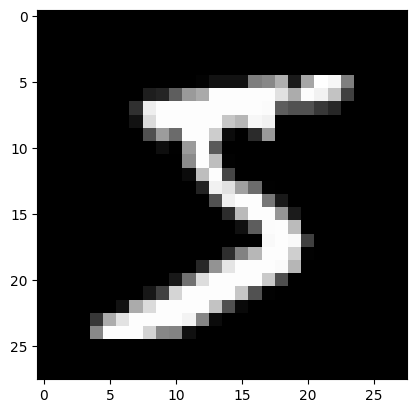

In [4]:
plt.imshow(X_train[0], cmap='grey')

Reshape the data, normalize it, and convert the data type to 32 bit floating number for optimal GPU processing

X_train is 60_000 rows of 28x28 values --> reshaped to 60_000 x 784

X_test is 10_000 rows of 28x28 values --> reshaped to 10_000 x 784

In [5]:
RESHAPED = 784
X_train = X_train.reshape(60_000, RESHAPED)
X_test = X_test.reshape(10_000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


Convert class vectors to binary class matrices

In [6]:
Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

Configure the model and print a summary

In [7]:
model = Sequential()
model.add(Input(shape=(RESHAPED,)))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [8]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [9]:
history = model.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4477 - loss: 1.8426 - val_accuracy: 0.8356 - val_loss: 0.7257
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.6642 - val_accuracy: 0.8847 - val_loss: 0.4531
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8797 - loss: 0.4558 - val_accuracy: 0.8979 - val_loss: 0.3754
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8936 - loss: 0.3847 - val_accuracy: 0.9053 - val_loss: 0.3383
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9039 - loss: 0.3467 - val_accuracy: 0.9092 - val_loss: 0.3142
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9082 - loss: 0.3251 - val_accuracy: 0.9153 - val_loss: 0.2967
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9140 - loss: 0.3046 - val_accuracy: 0.9208 - val_loss: 0.2828
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9171 - loss: 0.2918 - val_accuracy: 0.

Evaluate the model

In [11]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.9351 - loss: 0.2198


# Experiment 1

- Adding a Dropout of 0.3

- Increasing number epochs to 250

Setup base network and training variables.

A DROPOUT of 0.3 is added and NB_EPOCH is increased to 250

In [12]:
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure model with Dropout

In [13]:
model_with_dropout_03 = Sequential()
model_with_dropout_03.add(Input(shape=(RESHAPED,)))
model_with_dropout_03.add(Dense(N_HIDDEN))
model_with_dropout_03.add(Activation('relu'))
model_with_dropout_03.add(Dropout(DROPOUT))
model_with_dropout_03.add(Dense(N_HIDDEN))
model_with_dropout_03.add(Activation('relu'))
model_with_dropout_03.add(Dropout(DROPOUT))
model_with_dropout_03.add(Dense(NB_CLASSES))
model_with_dropout_03.add(Activation('softmax'))
model_with_dropout_03.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model with Dropout

In [14]:
model_with_dropout_03.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [15]:
history = model_with_dropout_03.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2982 - loss: 2.0668 - val_accuracy: 0.8069 - val_loss: 0.9434
Epoch 2/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6896 - loss: 1.0411 - val_accuracy: 0.8683 - val_loss: 0.5416
Epoch 3/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7737 - loss: 0.7330 - val_accuracy: 0.8890 - val_loss: 0.4254
Epoch 4/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8082 - loss: 0.6263 - val_accuracy: 0.8978 - val_loss: 0.3718
Epoch 5/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8332 - loss: 0.5466 - val_accuracy: 0.9066 - val_loss: 0.3388
Epoch 6/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.5043 - val_accuracy: 0.9112 - val_loss: 0.3153
Epoch 7/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.4603 - val_accuracy: 0.9148 - val_loss: 0.2971
Epoch 8/250
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8662 - loss: 0.4444 - val_accu

Evaluate the model

In [16]:
score = model_with_dropout_03.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.9754 - loss: 0.0913


# Experiment 2

- Adding a dropout of 0.3

- Setting number of epochs to 20

- Changing the optimiser to RMSprop

Setup base network and training variables.

A DROPOUT of 0.3 is added, and NB_EPOCH is set to 250, and OPTIMIZER is set to RMSprop

In [17]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure the model with dropout and RMSprop optimizer

In [18]:
model_with_rmsprop = Sequential()
model_with_rmsprop.add(Input(shape=(RESHAPED,)))
model_with_rmsprop.add(Dense(N_HIDDEN))
model_with_rmsprop.add(Activation('relu'))
model_with_rmsprop.add(Dropout(DROPOUT))
model_with_rmsprop.add(Dense(N_HIDDEN))
model_with_rmsprop.add(Activation('relu'))
model_with_rmsprop.add(Dropout(DROPOUT))
model_with_rmsprop.add(Dense(NB_CLASSES))
model_with_rmsprop.add(Activation('softmax'))
model_with_rmsprop.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile model

In [19]:
model_with_rmsprop.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run the training

In [20]:
history = model_with_rmsprop.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7589 - loss: 0.7789 - val_accuracy: 0.9463 - val_loss: 0.1806
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9268 - loss: 0.2435 - val_accuracy: 0.9593 - val_loss: 0.1386
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9458 - loss: 0.1813 - val_accuracy: 0.9668 - val_loss: 0.1127
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9555 - loss: 0.1504 - val_accuracy: 0.9703 - val_loss: 0.1027
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9618 - loss: 0.1298 - val_accuracy: 0.9707 - val_loss: 0.1008
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9651 - loss: 0.1182 - val_accuracy: 0.9717 - val_loss: 0.1001
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9694 - loss: 0.1020 - val_accuracy: 0.9731 - val_loss: 0.0939
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9693 - loss: 0.0996 - val_accuracy: 0.

evaluate the model

In [21]:
score = model_with_rmsprop.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.9747 - loss: 0.1078


# Experiment 3

- Adding a dropout of 0.3

- Setting number of epochs to 20

- Changing the optimiser to Adam

Setup base network and training variables.

A DROPOUT of 0.3 is added, and NB_EPOCH is set to 20, and OPTIMIZER is set to Adam

In [22]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

Configure the model with 0.3 dropout and Adam optimizer

In [23]:
model_with_adam = Sequential()
model_with_adam.add(Input(shape=(RESHAPED,)))
model_with_adam.add(Dense(N_HIDDEN))
model_with_adam.add(Activation('relu'))
model_with_adam.add(Dropout(DROPOUT))
model_with_adam.add(Dense(N_HIDDEN))
model_with_adam.add(Activation('relu'))
model_with_adam.add(Dropout(DROPOUT))
model_with_adam.add(Dense(NB_CLASSES))
model_with_adam.add(Activation('softmax'))
model_with_adam.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [24]:
model_with_adam.compile(
    loss='categorical_crossentropy',
    optimizer=OPTIMIZER,
    metrics=['accuracy']
)

Run training

In [25]:
history = model_with_adam.fit(
    X_train,
    Y_train,
    batch_size=BATCH_SIZE,
    epochs=NB_EPOCH,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7315 - loss: 0.8626 - val_accuracy: 0.9439 - val_loss: 0.1902
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9266 - loss: 0.2494 - val_accuracy: 0.9599 - val_loss: 0.1378
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9471 - loss: 0.1818 - val_accuracy: 0.9652 - val_loss: 0.1181
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9549 - loss: 0.1484 - val_accuracy: 0.9695 - val_loss: 0.1027
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9613 - loss: 0.1280 - val_accuracy: 0.9703 - val_loss: 0.0999
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accuracy: 0.9727 - val_loss: 0.0966
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1006 - val_accuracy: 0.9740 - val_loss: 0.0931
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.0954 - val_accuracy: 0.

Evaluate the model

In [26]:
score = model_with_adam.evaluate(X_test, Y_test, verbose=VERBOSE)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9752 - loss: 0.0916


# Experiments Summary

Here was the configuration for baseline model:

| Parameter               | Value    |
|-------------------------|----------|
| Epochs                  | 20       |
| Batch Size              | 128      |
| Optimizer               | SGD      |
| Number of Hidden Layers | 2        |
| Dropout                 | None     |

Here were the accuracy results:

| Metric     | Accuracy |
|------------|----------|
| Training   | ~94.4%   |
| Validation | ~94.5%   |
| Test       | ~93.5%   |

After this, I ran 3 separate experiments.

<hr>

### Experiment 1 Summary

Here was the configuration of the 1st experiment which increased the number of epochs and added a 0.3 dropout:

| Parameter               | Value    |
|-------------------------|----------|
| Epochs                  | 250      |
| Batch Size              | 128      |
| Optimizer               | SGD      |
| Number of Hidden Layers | 2        |
| Dropout                 | 0.3      |

Results:

| Metric     | Accuracy |
|------------|----------|
| Training   | ~98.1%   |
| Validation | ~97.7%   |
| Test       | ~97.5%   |

This was approximately 3-4% better than the baseline model.

<hr>

### Experiment 2 Summary

Here was the configuration of the 2nd experiment which set the number of epochs back to 20, kept the 0.3 dropout, and changed the optimizer to RMSprop.

| Parameter               | Value    |
|-------------------------|----------|
| Epochs                  | 20       |
| Batch Size              | 128      |
| Optimizer               | RMSprop  |
| Number of Hidden Layers | 2        |
| Dropout                 | 0.3      |

Results:

| Metric     | Accuracy |
|------------|----------|
| Training   | ~98.2%   |
| Validation | ~97.8%   |
| Test       | ~97.4%   |

This was again about 3-4% better than the base model with the training and validation accuracy slightly better than experiment 1.

<hr>

### Experiment 3 Summary

This was the configuration for the 3rd and final experiment which retained the same configuration as the 2nd except for the optimizer, which was changed to Adam:

| Parameter               | Value    |
|-------------------------|----------|
| Epochs                  | 20       |
| Batch Size              | 128      |
| Optimizer               | Adam     |
| Number of Hidden Layers | 2        |
| Dropout                 | 0.3      |

Results:

| Metric     | Accuracy |
|------------|----------|
| Training   | ~98.3%   |
| Validation | ~97.6%   |
| Test       | ~97.5%   |

As with the 1st and 2nd experiments, the model was about 3-4% better than the base model with a slight increase in training accuracy and a slightly lower validation accuracy.

<hr>

### Conclusion

The baseline model achieved training, validation, and test accuracies around 94–95% using SGD with 20 epochs and no dropout. In the first experiment, increasing the epochs to 250 and adding 0.3 dropout improved performance by 3–4%, as the model had more time to learn and dropout reduced overfitting. The second experiment kept dropout but switched to RMSprop, which adapted learning rates and achieved similar gains in just 20 epochs. Finally, the third experiment replaced RMSprop with Adam, which slightly improved training accuracy but resulted in a small dip in validation accuracy due to potentially overfitting. Overall, the combination of more training time, regularization, and advanced optimizers significantly enhanced the model’s generalization and accuracy.
